# **Machine Translation-Enabled Sentiment Analysis Across Multiple Languages**

Subject of Focus: Sentiment Analysis and Machine translation
Link: https://www.kaggle.com/datasets/sid321axn/amazon-alexa-reviews
We all agreed to use the above- mentioned dataset, obtained from Kaggle, for our research and analysis. 
This dataset includes information about the Reviews for Amazon alex models and also the rating given by the reviewer..

## **Sentiment Analysis**

Sentiment analysis is a natural language processing technique that involves the use of computational methods to identify, extract, and quantify the emotional tone and subjective information present in text data. It involves analyzing a piece of text to determine whether the overall sentiment expressed is positive, negative, or neutral. Sentiment analysis algorithms use various techniques such as machine learning, lexicon-based approaches, and rule-based systems to extract sentiment from textual data. The applications of sentiment analysis include brand reputation management, customer feedback analysis, social media monitoring, and market research.

This project involves analyzing and predicting the sentiment of a review extracted from our dataset using some of the methods discussed. Because our dataset contains ratings rather than explicit sentiment values such as Positive, Negative, and Neutral, we intend to convert the ratings into one of these categories before performing sentiment analysis on them.


## **Machine Translation**

Machine translation is a branch of natural language processing that uses computational methods to translate text or speech from one language to another. It involves using algorithms and statistical models to analyze and understand the structure of the input text before generating an equivalent output text in the target language. Machine translation can be achieved using an array of methods, including rule-based systems, statistical models, and neural networks. Language localization in software and websites, international communication, and global business are just a few of the applications for machine translation.

Our project aims to leverage machine translation to convert reviews in other languages into English, followed by conducting sentiment analysis on them. This approach would be particularly beneficial if our review corpus or any other text data contains multiple languages, which would significantly enhance the accuracy of our prediction model.

## **Dataset**

We are using the following dataset from Kaggel :- https://www.kaggle.com/datasets/sid321axn/amazon-alexa-reviews 

This dataset contains nearly 3000 Amazon customer reviews (input text), star ratings, date of review, variant, and feedback of various Amazon Alexa products such as Alexa Echo, Echo dots, Alexa Firesticks, and so on. This data can be used to analyze Amazon's Alexa product, gain insights into consumer reviews, and aid machine learning models.

Below is the data dictionary for our dataset.

*   Rating :- product ratings values from 1-5.
*   date :- date the review was given.
*   Variation :- the variation of amazon alexa the customer bought.
*   Verified_reviews :- Verified reviews on which we will do our machine translation and Sentiment Analysis.
* Feedback :- has a value of either 1 or 0.


## Phase 1

## **Exploratory Data Analysis**

In [20]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

Reading our data as a pandas dataframe

In [21]:
df = pd.read_csv('Translated.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.dropna(inplace=True)
df = df.drop(['TranslatedText'], axis=1)
df.head()

,rating,date,variation,verified_reviews,feedback,Length,language
0,5,29-Jul-18,Heather Gray Fabric,Ayez Alexa dans toute la maison ---- le futur ...,1,58,fr
1,5,30-Jul-18,Configuration: Fire TV Stick,Plenty of options to choose from!,1,33,en
3,5,30-Jul-18,Heather Gray Fabric,Le haut-parleur a un excellent son et fonction...,1,52,fr
4,5,28-Jul-18,White Plus,¡Mejor de lo esperado!,1,21,es
5,4,30-Jul-18,Black Spot,"Yo era escéptico al principio, pero ""eso"" crec...",1,117,es


### Google Translate

In [3]:
from googletrans import Translator, constants
translator = Translator()

In [6]:
pip install -U deep-translator

Note: you may need to restart the kernel to use updated packages.


In [8]:
from deep_translator import GoogleTranslator
translator = GoogleTranslator(source='auto', target='en')
translated = []
count = 0
for value in df['verified_reviews']:
    translated.append(translator.translate(value))
    count+=1
    if i%10 == 0:
        print(count)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


In [ ]:
from deep_translator import GoogleTranslator
translator = GoogleTranslator(source='auto', target='en')
translated = []
count = 0
for value in df['verified_reviews']:
    translated.append(translator.translate(value))

In [22]:
df['TranslatedText'] = translated

In [23]:
df.head()

,rating,date,variation,verified_reviews,feedback,Length,language,TranslatedText
0,5,29-Jul-18,Heather Gray Fabric,Ayez Alexa dans toute la maison ---- le futur ...,1,58,fr,Have Alexa throughout the house ---- the futur...
1,5,30-Jul-18,Configuration: Fire TV Stick,Plenty of options to choose from!,1,33,en,Plenty of options to choose from!
3,5,30-Jul-18,Heather Gray Fabric,Le haut-parleur a un excellent son et fonction...,1,52,fr,The speaker sounds great and works perfectly!
4,5,28-Jul-18,White Plus,¡Mejor de lo esperado!,1,21,es,Better than expected!
5,4,30-Jul-18,Black Spot,"Yo era escéptico al principio, pero ""eso"" crec...",1,117,es,"I was skeptical at first, but ""it"" grows on yo..."


We printed summary statistics using the pandas.describe() method. The data types of the data fields were printed using the pandas.datatypes command.

In [24]:
print('Data Types:')
print(df.dtypes)
print('\n')
print('Statistical Descriptions:')
print(df.describe())
print('\n')

Data Types:
rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
Length               int64
language            object
TranslatedText      object
dtype: object


Statistical Descriptions:
            rating     feedback       Length
count  2963.000000  2963.000000  2963.000000
mean      4.473844     0.920013   134.446507
std       1.057229     0.271318   184.665843
min       1.000000     0.000000     1.000000
25%       4.000000     1.000000    30.000000
50%       5.000000     1.000000    75.000000
75%       5.000000     1.000000   167.500000
max       5.000000     1.000000  2851.000000




Checking what percentage each rating has


In [25]:
df.rating.value_counts()

5    2161
4     428
1     146
3     137
2      91
Name: rating, dtype: int64

Text(0.5, 1.0, 'Alexa Rating')

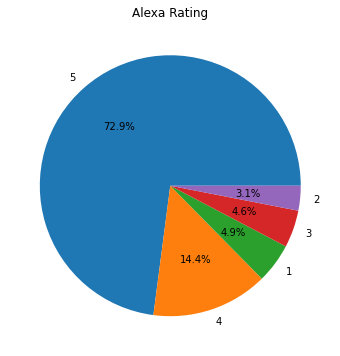

In [26]:
labels = ['5','4','1','3','2']
plt.figure(figsize=(10,6))
plt.pie(df.rating.value_counts(), labels=labels, autopct='%1.1f%%')
plt.title('Alexa Rating')

In [31]:
#df = df.drop('Unnamed: 0',axis=1,inplace=True)
df.isna().sum()
dfresult = df.dropna()
df = dfresult

In [32]:
df.isna().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
Length              0
language            0
TranslatedText      0
dtype: int64

Here we are classifying rating equal to or greater than 4 as good reviews and below is the word cloud for the same.

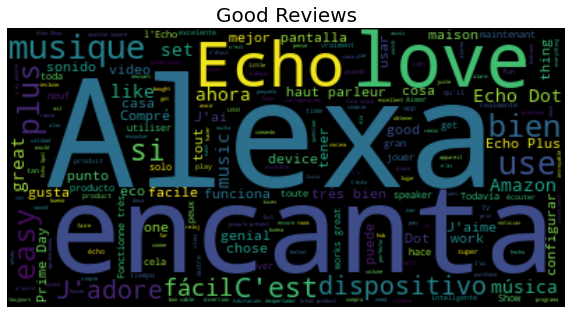

In [34]:
from nltk.corpus import stopwords
reviews = ' '.join(df[df['rating']>=4]['verified_reviews'].tolist())
plt.figure(figsize=(10,6))
st = stopwords.words('french') + stopwords.words('spanish') + stopwords.words('english')
wordcloud = WordCloud(stopwords=st,background_color="black").generate(reviews)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Good Reviews',size=20)
plt.savefig('language.png', facecolor='k', bbox_inches='tight')

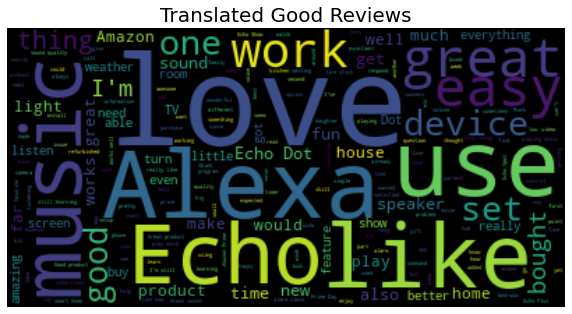

In [35]:
reviews = ' '.join(df[df['rating']>=4]['TranslatedText'].tolist())
plt.figure(figsize=(10,6))
st = stopwords.words('french') + stopwords.words('spanish') + stopwords.words('english')
wordcloud = WordCloud(stopwords=st,background_color="black").generate(reviews)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Translated Good Reviews',size=20)
plt.savefig('translated_good.png', facecolor='k', bbox_inches='tight')

Here we are classifying rating equal to or lesser than 3 as bar reviews and below is the word cloud for the same

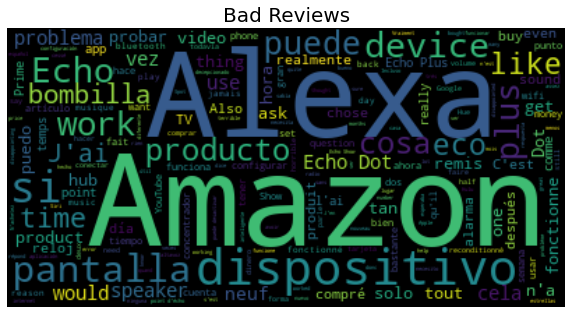

In [36]:
reviews = ' '.join(df[df['rating']<3]['verified_reviews'].tolist())
plt.figure(figsize=(10,6))
st = stopwords.words('french') + stopwords.words('spanish') + stopwords.words('english')
wordcloud = WordCloud(stopwords=st,background_color="black").generate(reviews)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Bad Reviews',size=20)
plt.savefig('bad.png', facecolor='k', bbox_inches='tight')

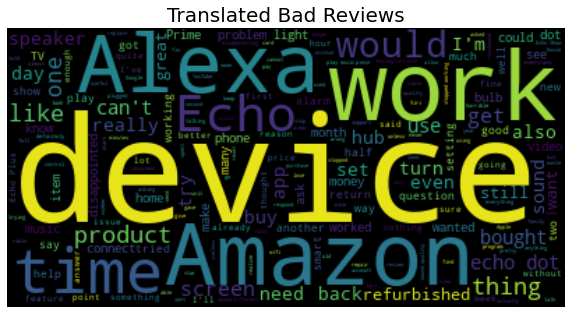

In [37]:
reviews = ' '.join(df[df['rating']<3]['TranslatedText'].tolist())
plt.figure(figsize=(10,6))
st = stopwords.words('french') + stopwords.words('spanish') + stopwords.words('english')
wordcloud = WordCloud(stopwords=st,background_color="black").generate(reviews)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Translated Bad Reviews',size=20)
plt.savefig('translated_bad.png', facecolor='k', bbox_inches='tight')

Below is plot of all the different variations of the amazon alexa which was reviewed.

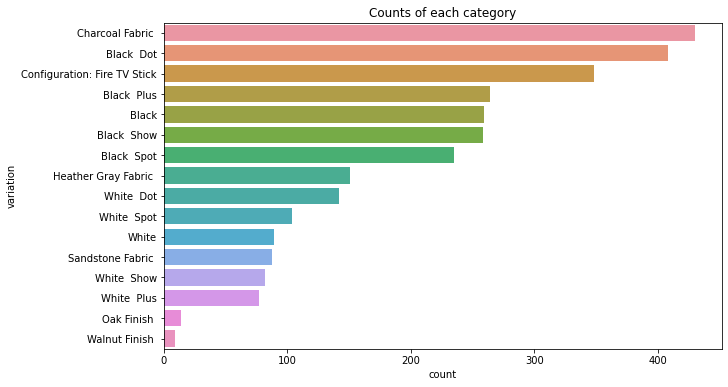

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, y='variation',
              order = df['variation'].value_counts().index)
plt.title('Counts of each category')
plt.show()

Looking at the actual number of reviews per rating.

#### **Some of the questions we want to try answering and exploring possible solutions are.**

*   Can sentiment analysis be done on any dataset with other language text?
*   How accurate will the Machine translation of the language be? Will it convey the same message as the review/text in the original language.
*   Is it better to train or Models based on the original language or is it better to train our models by translating the text from original language to English? What are the drawbacks? What are the Pros?

#### **Future scope**

*   Create a webapp to take in text which would then translate it to english and outputs the Sentiment(positive, Negative and neutral)
*   Extending on the webapp we would like to have a feature where the users are able to upload a photo with different language and output the translated text in english.



## Phase 2

In [39]:
import nltk
nltk.download("stopwords","wordnet")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to wordnet...
[nltk_data]   Unzipping corpora/stopwords.zip.


PandasProfiling is a Python package that generates an exploratory data analysis report for a Pandas DataFrame. The report includes information on the DataFrame's data types, missing values, unique values, correlations, distribution of values, and more. The report is generated as an HTML file, which makes it easy to view and share. PandasProfiling can be used to quickly gain insights into a dataset and identify potential issues that may need to be addressed before further analysis. It is a useful tool for data analysts, scientists, and engineers who work with Pandas DataFrames.





We will be adding a new column called "Length" to a pandas DataFrame called "df". The new column contains the length (number of characters) of each review in the "verified_reviews" column of the DataFrame. The "apply(len)" function is used to apply the "len" function to each review in the "verified_reviews" column. Finally, the "head()" function is used to display the first few rows of the DataFrame, including the new "Length" column.

In [40]:
# Getting the Length of each Review
df['Length'] = df['verified_reviews'].apply(len) ## Getting the length of each tweet
df.head()

<ipython-input-40-52352a5047ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Length'] = df['verified_reviews'].apply(len) ## Getting the length of each tweet


,rating,date,variation,verified_reviews,feedback,Length,language,TranslatedText
0,5,29-Jul-18,Heather Gray Fabric,Ayez Alexa dans toute la maison ---- le futur ...,1,58,fr,Have Alexa throughout the house ---- the futur...
1,5,30-Jul-18,Configuration: Fire TV Stick,Plenty of options to choose from!,1,33,en,Plenty of options to choose from!
3,5,30-Jul-18,Heather Gray Fabric,Le haut-parleur a un excellent son et fonction...,1,63,fr,The speaker sounds great and works perfectly!
4,5,28-Jul-18,White Plus,¡Mejor de lo esperado!,1,22,es,Better than expected!
5,4,30-Jul-18,Black Spot,"Yo era escéptico al principio, pero ""eso"" crec...",1,109,es,"I was skeptical at first, but ""it"" grows on yo..."


Text(0.5, 0, 'Length of the Reviews')

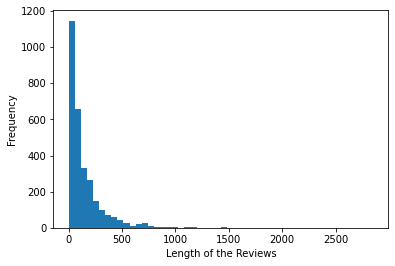

In [41]:
df['Length'].plot(bins=50, kind='hist') 
plt.xlabel('Length of the Reviews')

array([[<AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>],
       [<AxesSubplot:title={'center':'5'}>, <AxesSubplot:>]], dtype=object)

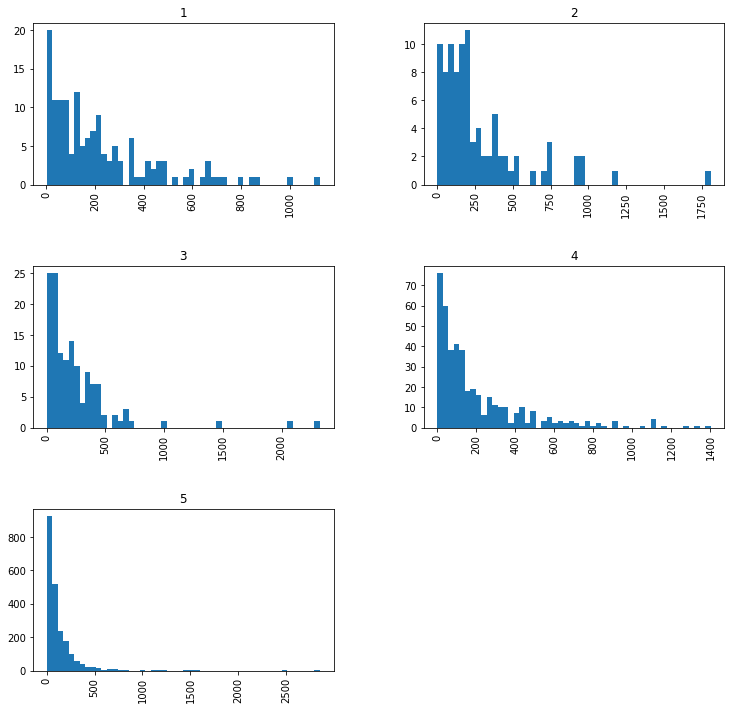

In [42]:
df.hist(column='Length', by='rating', bins=50,figsize=(12,12))

In [43]:
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

In [44]:
# Cleaning Function
lem = WordNetLemmatizer()
clean_data = []
for i in tqdm(range(len(df))):
    sent = re.sub('[^a-zA-Z]',' ',df['TranslatedText'][i])
    sent = sent.lower()
    sent = sent.split()
    sent = [lem.lemmatize(word) for word in sent if word not in stopwords.words('english')]
    sent = ' '.join(sent)
    clean_data.append(sent)

  0%|          | 2/2958 [00:00<21:52,  2.25it/s]


KeyError: 2

This code generates a horizontal bar graph that shows the 15 most common words found in a dataset after removing stop words (common words that do not carry much meaning, such as "the" and "and").

The first line creates a new DataFrame called "clean_tweets_nsw" using the "most_common" method from the "collections" module to extract the 15 most common words and their corresponding counts from the original dataset after removing stop words.

The second line creates a figure and an axes object to hold the plot.

The third line plots a horizontal bar graph of the top 15 words and their counts, using the "sort_values" method to sort the data by count and the "plot.barh" method to generate the horizontal bar chart. The bars are colored in purple.

The fourth line sets the title of the plot, and the final line displays the graph.

In [45]:
import collections

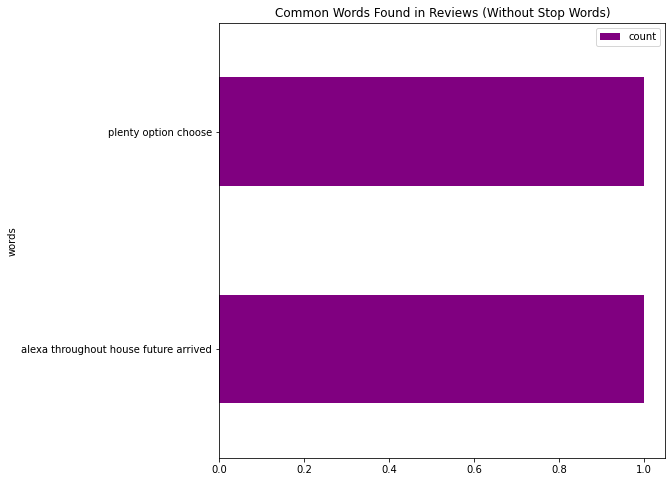

In [46]:
counts_nsw = collections.Counter(clean_data)
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Reviews (Without Stop Words)")

plt.show()

The TF-IDF (Term Frequency-Inverse Document Frequency) vectorizer is a numerical feature extraction technique used in natural language processing (NLP) to represent textual data as numerical features. It works by first computing the frequency of each word in a document and then weighing down the common words by dividing their frequency by the number of documents in the corpus that contain them. This helps to reduce the impact of common words on the overall document representation, while highlighting the importance of rare words that are specific to a document. The resulting TF-IDF matrix can be used as input to machine learning models for tasks such as text classification, clustering, and information retrieval.

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()

In [48]:
X = tf.fit_transform(clean_data).toarray()

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
ytrue = np.array(df['rating'].apply(lambda x: 1 if x >= 3 else 0))

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, ytrue, test_size=0.2, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [2, 2958]

For now we are going to implement five baseline models and check how the performance is on our Data. In the next phase we will be working on improving the models.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, f1_score

In [ ]:
lr = LogisticRegression()
svc = SVC()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
nb = MultinomialNB(alpha=1.5)

In [ ]:
model = Sequential()
model.add(Dense(units=480,activation='relu'))
model.add(Dense(units=240,activation='relu'))
model.add(Dense(units=6,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
lr.fit(X_train,y_train)
svc.fit(X_train,y_train)
dt.fit(X_train,y_train)
knn.fit(X_train,y_train)
nb.fit(X_train,y_train)
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

In [ ]:
models = [lr,svc,dt,knn,nb]

In [ ]:
names = ['Logistic Regression','Support Vector Machines','Decision Trees','K Nearest Neighbours','Multinomial Naive Bayes','ANN']

In [ ]:
preds = []
for i in models:
  preds.append(i.predict(X_test))

In [ ]:
preds.append(np.argmax(model.predict(X_test), axis=-1))

In [ ]:
accuracies = []
f = []
for i in preds:
    accuracies.append(accuracy_score(y_test,i))
    f.append(f1_score(y_test,i,average='weighted'))

In [ ]:
pd.DataFrame(list(zip(accuracies, f)),index=names,columns=['Accuracy','f1 Score'])

### Vader

In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
pip install vadersentiment

     |████████████████████████████████| 125 kB 2.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
def sentiment_scores(sentence):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)
    return sentiment_dict

In [5]:
df.reset_index(inplace=True,drop=True)

NameError: name 'df' is not defined

In [6]:
y_pred = []  
for i in range(df.shape[0]):   
    d = sentiment_scores(df['TranslatedText'][i])
    del d['neu']
    del d['compound']
    sentiment = max(d, key = d.get)
    if sentiment == 'pos':
        y_pred.append(1)
    else:
        y_pred.append(0)

NameError: name 'df' is not defined

In [ ]:
accuracies.append(accuracy_score(ytrue,y_pred))
f.append(f1_score(ytrue,y_pred))
names.append('Vader')
pd.DataFrame(list(zip(accuracies, f)),index=names,columns=['Accuracy','F1 Score'])

## Pytesseract

In [ ]:
import cv2
from PIL import Image
from pytesseract import pytesseract
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
path_to_tesseract = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
pytesseract.tesseract_cmd = path_to_tesseract

In [ ]:
img = cv2.imread('test1.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 5)
thresh = cv2.bitwise_not(thresh)
img = thresh

In [ ]:
plt.imshow(img)

In [ ]:
def get_sentiment(img):
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    string = ''
    for i in pytesseract.get_languages(config=''):
        string+=i
        string+='+'
    text = pytesseract.image_to_string(img,lang=string)
    print("Text \n",text[:-1])
    tr = translator.translate(text)
    text = tr.text
    print("Translated Text \n",text)
    d = sentiment_scores(text)
    del d['neu']
    del d['compound']
    sentiment = max(d, key = d.get)
    if sentiment == 'pos':
        print("The sentiment is ",1)
    else:
        print("The sentiment is ",0)

In [ ]:
get_sentiment(img)